In [14]:
import os
os.environ["PYOPENGL_PLATFORM"] = "egl"
import pyrender
import cv2
import glob
import json
import time
import trimesh
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=3)
from scipy.spatial.transform import Rotation as R
from bpc.inference.utils.camera_utils import load_camera_params
from bpc.inference.process_pose import PoseEstimator, PoseEstimatorParams
from bpc.utils.data_utils import Capture, render_mask
import bpc.utils.data_utils as du
import importlib

Loading camera parameters from: ./datasets/ipd/test/000003/scene_camera_cam3.json
Missing GT files for cam1
[]
Processing image shape: (2160, 3840, 3)

0: 736x1280 3 object_11s, 9.1ms
Speed: 9.0ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 4 object_11s, 8.2ms
Speed: 4.6ms preprocess, 8.2ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 6 object_11s, 8.0ms
Speed: 4.5ms preprocess, 8.0ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)

--- Cost Matrix Stats ---
Shape: (3, 4, 6)
Min: 2.2242, Max: 1454.5406, Mean: 614.6878

Random samples from cost_matrix:
  cost_matrix[1,0,1] = 215.4183
  cost_matrix[0,1,5] = 587.4769
  cost_matrix[2,2,0] = 1127.5547
  cost_matrix[0,1,2] = 580.3568
  cost_matrix[1,2,3] = 134.1120
0.9883325099945068


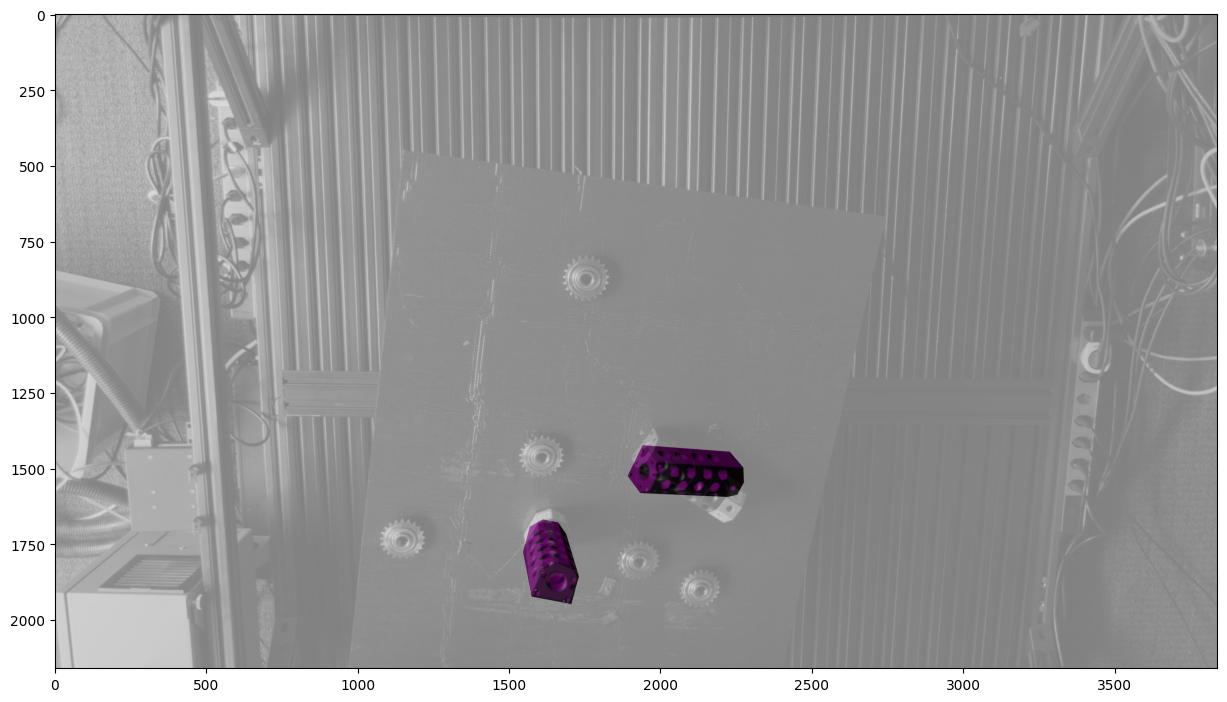

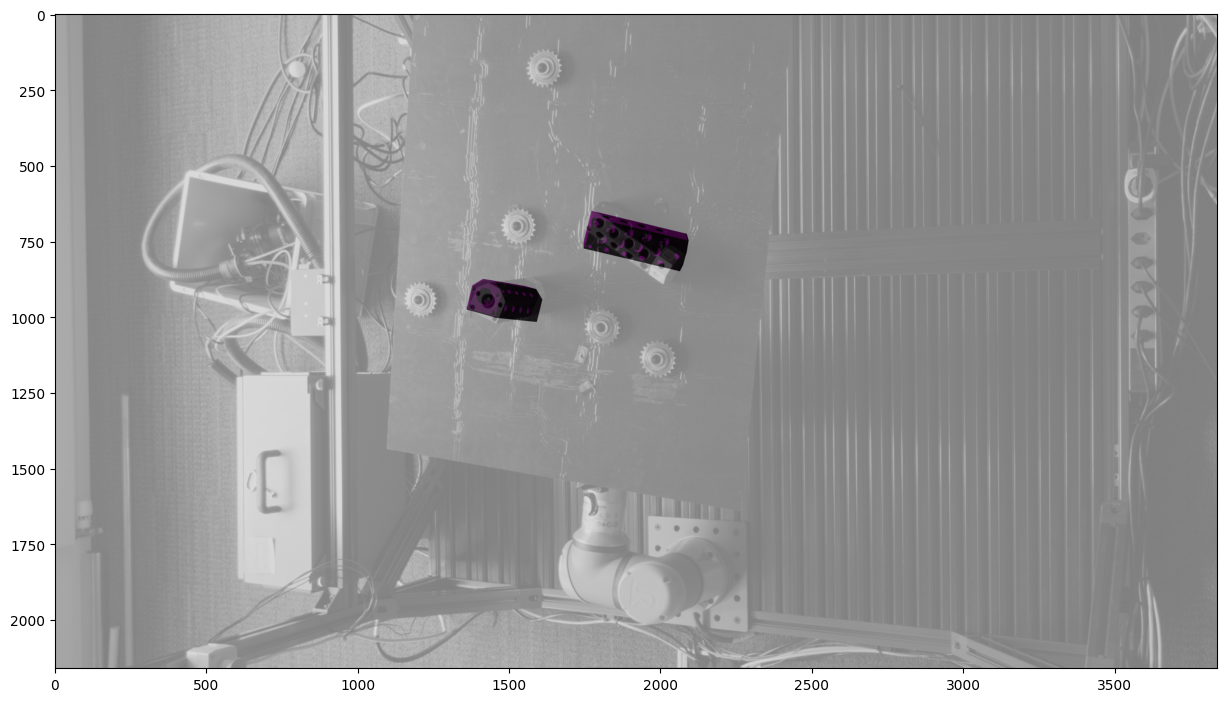

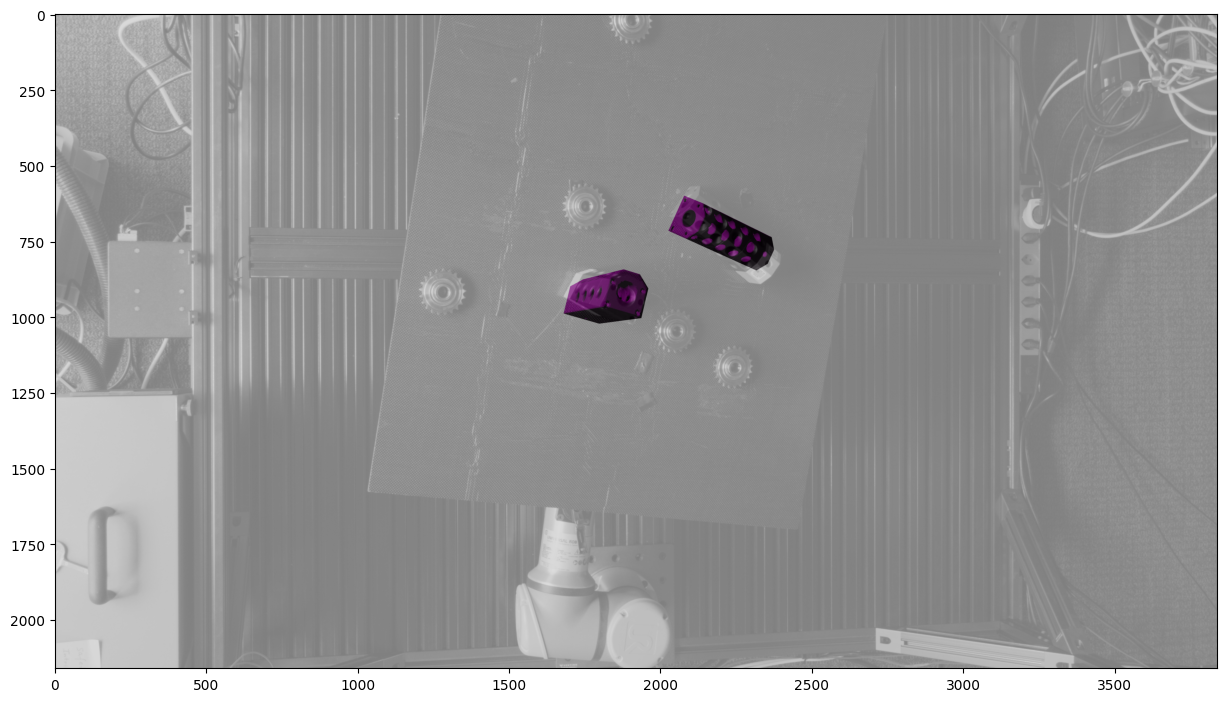

In [15]:
# scene_dir = "./datasets/ipd/test/000000/"
# models_dir = './datasets/ipd/models_eval/'
scene_dir = "./datasets/ipd/test/000003/"
models_dir = './datasets/ipd/models_eval/'
cam_ids = ["cam1", "cam2", "cam3"]
image_id = 3
obj_id = 11
obj_id_path = str(1000000+obj_id)[1:]
ply_file = os.path.join(models_dir, f"obj_{obj_id_path}.ply")
obj = trimesh.load(ply_file)
yolo_model_path = f'bpc/yolo/models/detection/obj_{obj_id}/yolo11-detection-obj_{obj_id}.pt'
pose_model_path = f'bpc/pose/pose_checkpoints/obj_{obj_id}/best_model.pth'

pose_params = PoseEstimatorParams(
    yolo_model_path=yolo_model_path,
    pose_model_path=pose_model_path, 
    yolo_conf_thresh=0.01,
    rotation_mode="quat"  # Using quaternion mode as in the checkpoint.
)
pose_estimator = PoseEstimator(pose_params)
t = time.time()
capture = Capture.from_dir(scene_dir, cam_ids, image_id, obj_id)
detections = pose_estimator._detect(capture)
pose_predictions = pose_estimator._match(capture, detections)
pose_estimator._estimate_rotation(pose_predictions)
print(time.time() - t)

for idx in range(len(capture.Ks)):
    plt.figure(figsize=(15, 15))
    plt.imshow(capture.images[idx])
    a, b = render_mask(obj, capture.Ks[idx], (capture.RTs[idx]), capture.images[0].shape[:2][::-1], [x.pose for x in pose_predictions])
    plt.imshow(a, alpha=0.5)
    plt.show()


Loading camera parameters from: ./datasets/ipd/test/000001/scene_camera_cam3.json
Missing GT files for cam1
[]
Processing image shape: (2160, 3840, 3)

0: 736x1280 9 object_14s, 8.5ms
Speed: 5.1ms preprocess, 8.5ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 4 object_14s, 8.0ms
Speed: 5.0ms preprocess, 8.0ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 7 object_14s, 8.0ms
Speed: 4.9ms preprocess, 8.0ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)

--- Cost Matrix Stats ---
Shape: (9, 4, 7)
Min: 2.6372, Max: 2396.9329, Mean: 1033.8890

Random samples from cost_matrix:
  cost_matrix[0,3,1] = 667.4081
  cost_matrix[2,2,2] = 4.8435
  cost_matrix[3,0,5] = 1181.5133
  cost_matrix[7,1,5] = 1238.1460
  cost_matrix[0,2,5] = 727.1384
1.1067261695861816


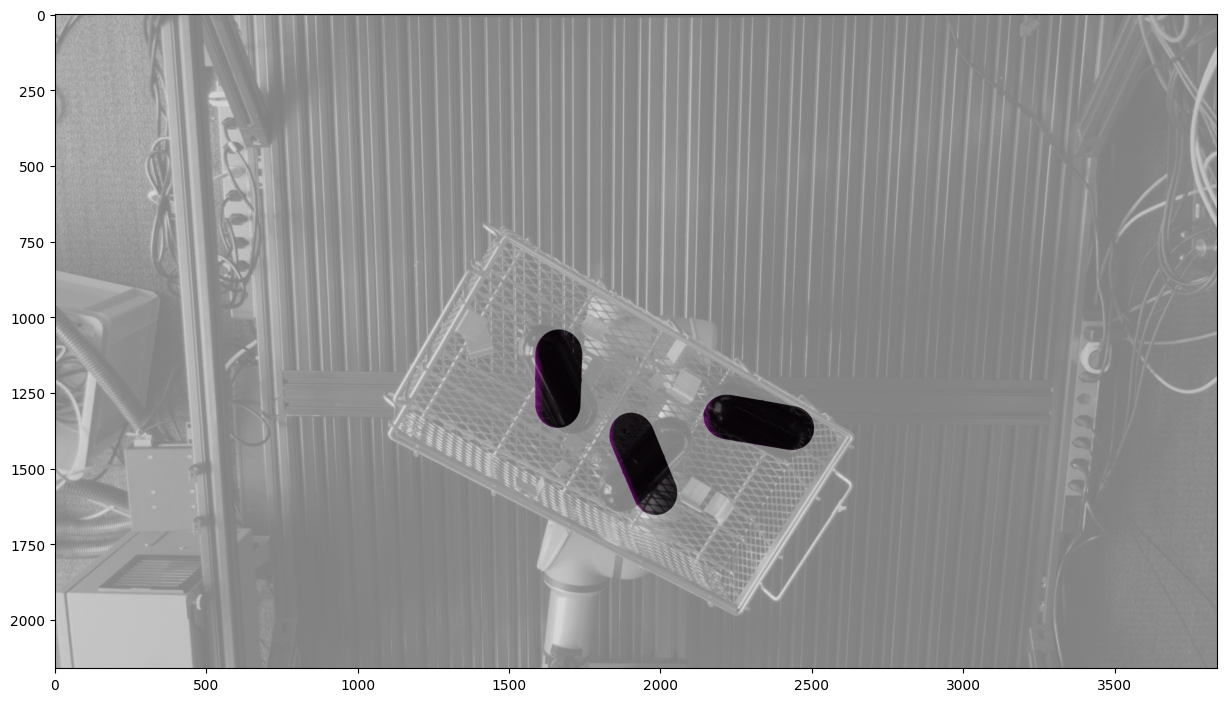

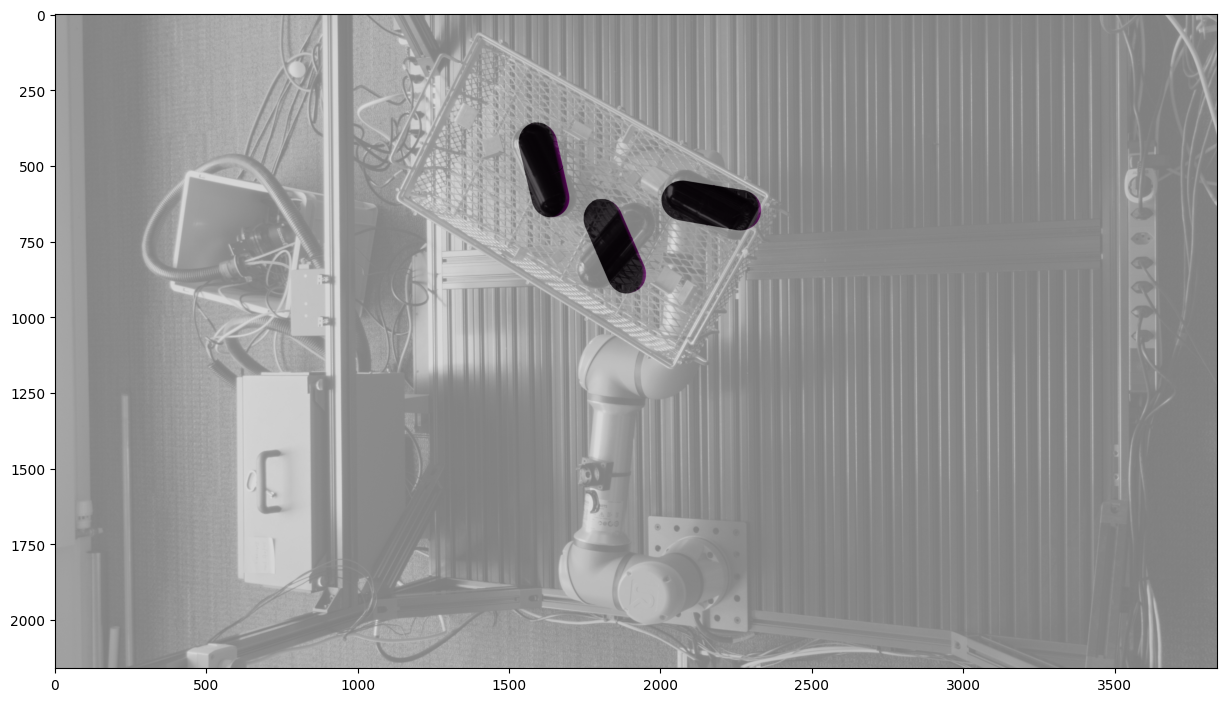

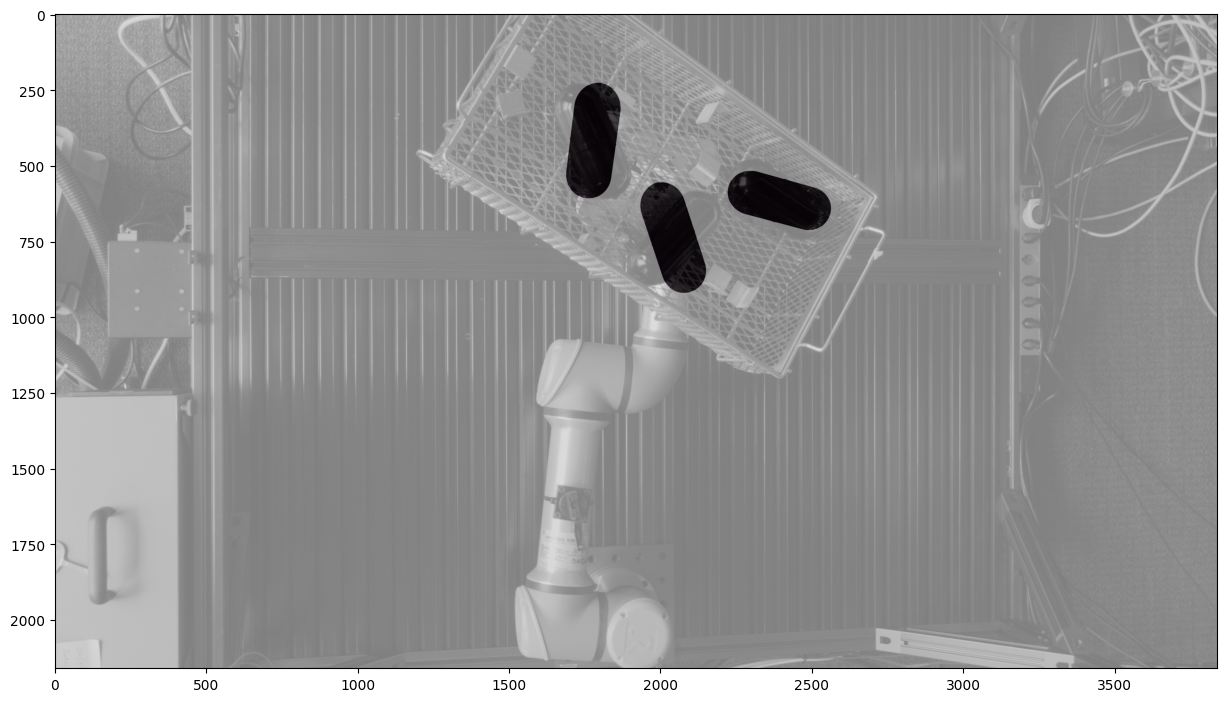

In [16]:
scene_dir = "./datasets/ipd/test/000001/"
models_dir = './datasets/ipd/models_eval/'
cam_ids = ["cam1", "cam2", "cam3"]
image_id = 3
obj_id = 14
obj_id_path = str(1000000+obj_id)[1:]
ply_file = os.path.join(models_dir, f"obj_{obj_id_path}.ply")
obj = trimesh.load(ply_file)
yolo_model_path = f'bpc/yolo/models/detection/obj_{obj_id}/yolo11-detection-obj_{obj_id}.pt'
pose_model_path = f'bpc/pose/pose_checkpoints/obj_{obj_id}/best_model.pth'

pose_params = PoseEstimatorParams(
    yolo_model_path=yolo_model_path,
    pose_model_path=pose_model_path, 
    yolo_conf_thresh=0.01,
    rotation_mode="quat"  # Using quaternion mode as in the checkpoint.
)
pose_estimator = PoseEstimator(pose_params)
t = time.time()
capture = Capture.from_dir(scene_dir, cam_ids, image_id, obj_id)
detections = pose_estimator._detect(capture)
pose_predictions = pose_estimator._match(capture, detections)
pose_estimator._estimate_rotation(pose_predictions)
print(time.time() - t)

for idx in range(len(capture.Ks)):
    plt.figure(figsize=(15, 15))
    plt.imshow(capture.images[idx])
    a, b = render_mask(obj, capture.Ks[idx], (capture.RTs[idx]), capture.images[0].shape[:2][::-1], [x.pose for x in pose_predictions])
    plt.imshow(a, alpha=0.5)
    plt.show()


Loading camera parameters from: ./datasets/ipd/test/000004/scene_camera_cam3.json
Missing GT files for cam1
[]
Processing image shape: (2160, 3840, 3)

0: 736x1280 4 object_8s, 9.1ms
Speed: 7.5ms preprocess, 9.1ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 4 object_8s, 8.7ms
Speed: 4.6ms preprocess, 8.7ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 5 object_8s, 9.0ms
Speed: 4.6ms preprocess, 9.0ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)

--- Cost Matrix Stats ---
Shape: (4, 4, 5)
Min: 3.8229, Max: 1202.7070, Mean: 551.5519

Random samples from cost_matrix:
  cost_matrix[2,0,1] = 216.7138
  cost_matrix[1,1,3] = 504.6805
  cost_matrix[0,1,0] = 4.2151
  cost_matrix[1,1,2] = 210.3235
  cost_matrix[1,1,4] = 732.3143
1.059868574142456


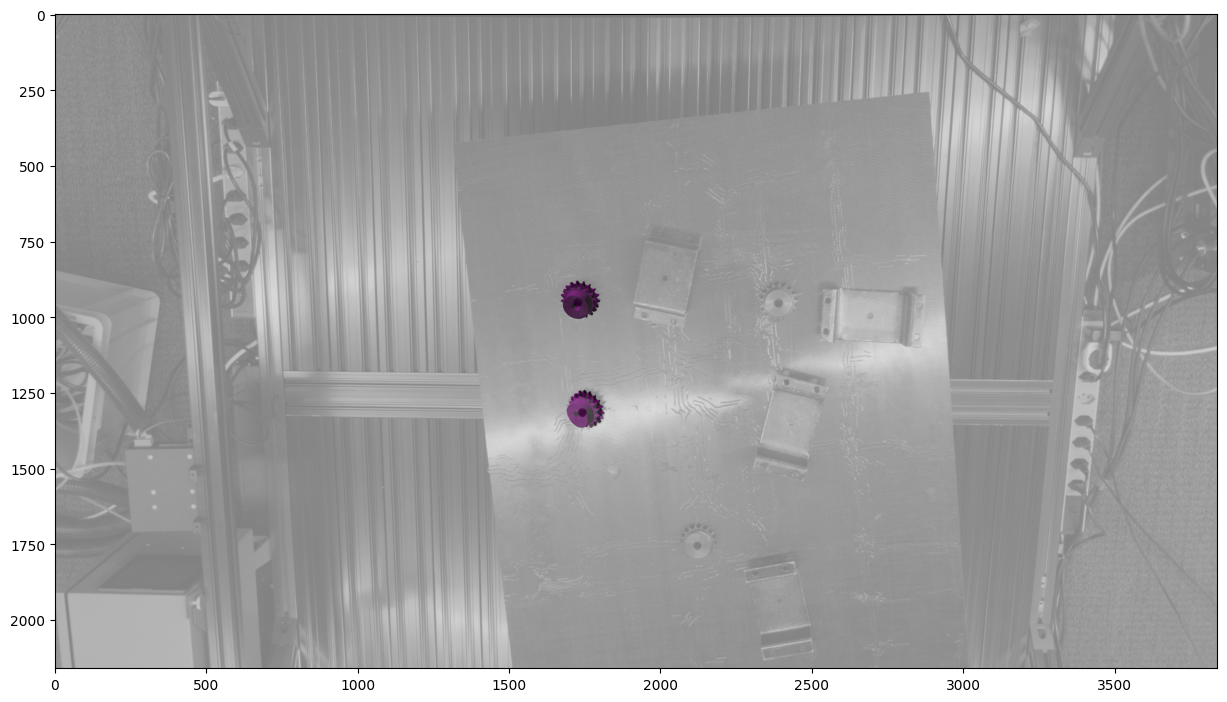

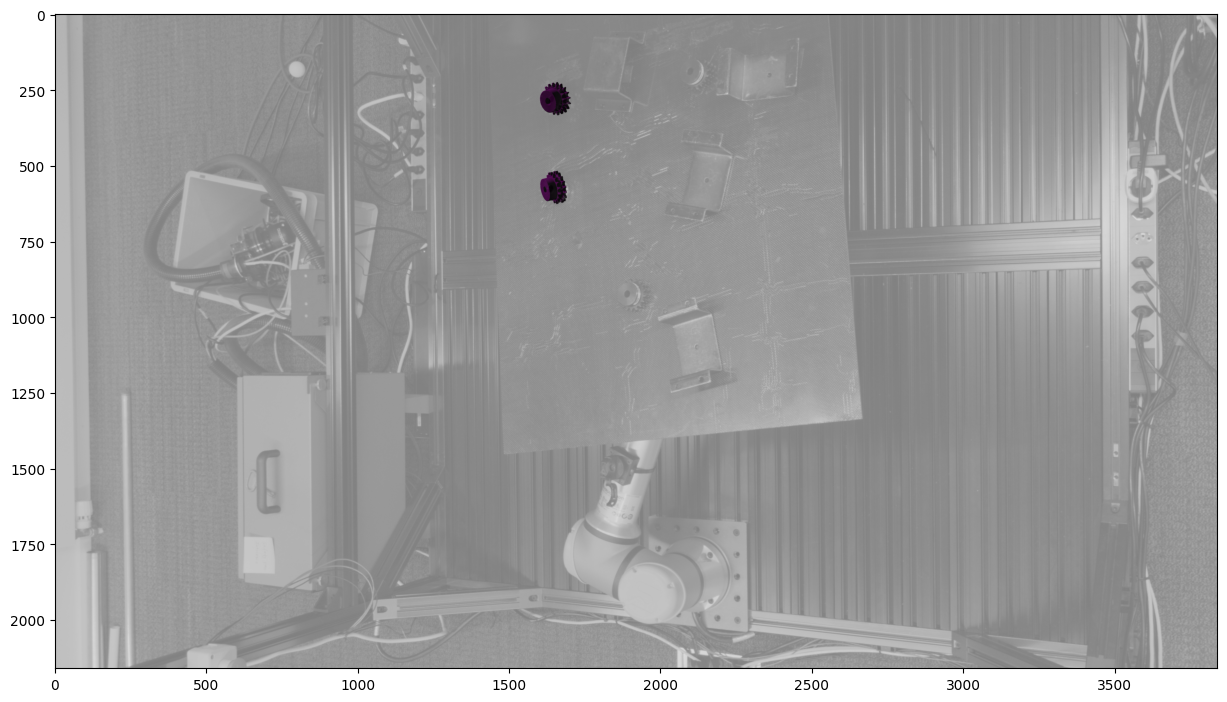

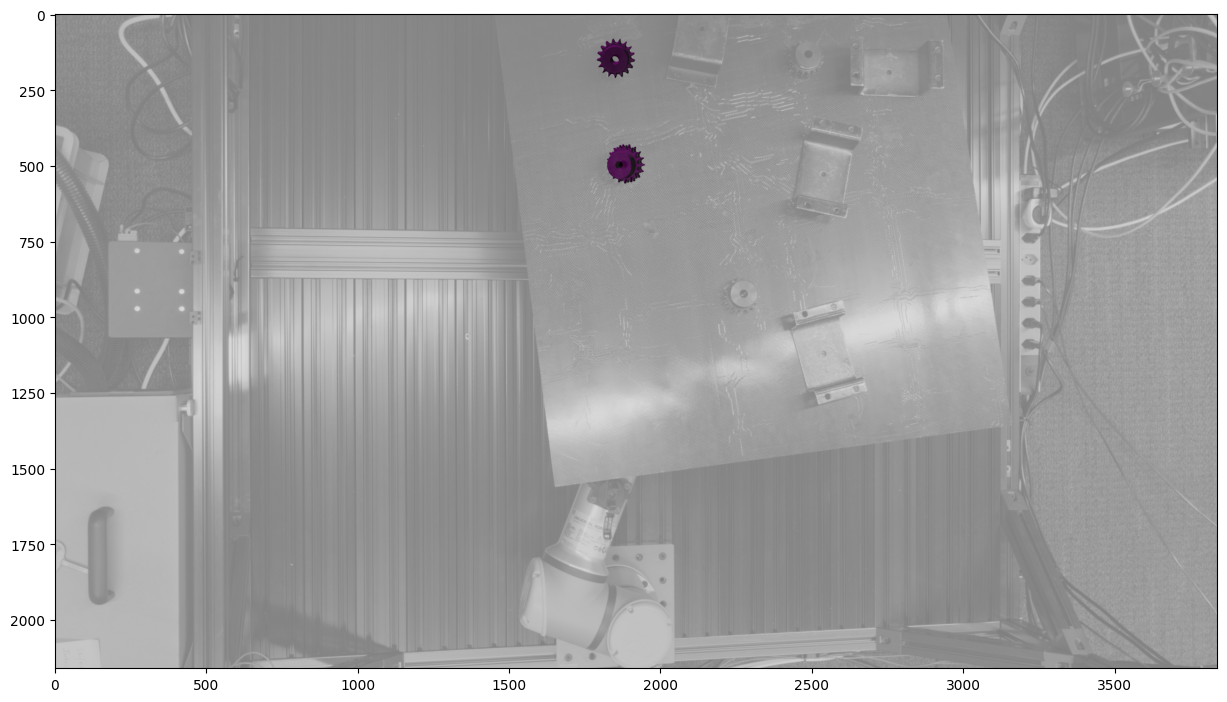

In [19]:
scene_dir = "./datasets/ipd/test/000004/"
models_dir = './datasets/ipd/models_eval/'
cam_ids = ["cam1", "cam2", "cam3"]
image_id = 1
obj_id = 8
obj_id_path = str(1000000+obj_id)[1:]
ply_file = os.path.join(models_dir, f"obj_{obj_id_path}.ply")
obj = trimesh.load(ply_file)
yolo_model_path = f'bpc/yolo/models/detection/obj_{obj_id}/yolo11-detection-obj_{obj_id}.pt'
pose_model_path = f'bpc/pose/pose_checkpoints/obj_{obj_id}/best_model.pth'

pose_params = PoseEstimatorParams(
    yolo_model_path=yolo_model_path,
    pose_model_path=pose_model_path, 
    yolo_conf_thresh=0.01,
    rotation_mode="quat"  # Using quaternion mode as in the checkpoint.
)
pose_estimator = PoseEstimator(pose_params)
t = time.time()
capture = Capture.from_dir(scene_dir, cam_ids, image_id, obj_id)
detections = pose_estimator._detect(capture)
pose_predictions = pose_estimator._match(capture, detections)
pose_estimator._estimate_rotation(pose_predictions)
print(time.time() - t)

for idx in range(len(capture.Ks)):
    plt.figure(figsize=(15, 15))
    plt.imshow(capture.images[idx])
    a, b = render_mask(obj, capture.Ks[idx], (capture.RTs[idx]), capture.images[0].shape[:2][::-1], [x.pose for x in pose_predictions])
    plt.imshow(a, alpha=0.5)
    plt.show()
